## Model Training:

#### Important data and required packages

In [42]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.metrics import mean_squared_error,r2_score,mean_absolute_error
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn. ensemble import RandomForestRegressor,AdaBoostRegressor
from sklearn.svm import SVR
from sklearn.linear_model import LinearRegression,Ridge,Lasso
from sklearn.model_selection import RandomizedSearchCV
from catboost import CatBoostRegressor
from xgboost import XGBRegressor
import warnings

#### ImportCSV Data as pandas DataFrame:

In [43]:
df=pd.read_csv('data/stud.csv')
df.head()

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


#### Preparing X and Y variables

In [44]:
X=df.drop(columns=['math_score'],axis=1)

In [45]:
y=df['math_score']

In [46]:
### Create column transformer with 3 types of transformer
num_features=X.select_dtypes(exclude='object').columns
cat_features=X.select_dtypes(include='object').columns

from sklearn.preprocessing import OneHotEncoder,StandardScaler
from sklearn.compose import ColumnTransformer

numeric_transformer=StandardScaler()
oh_transformer=OneHotEncoder()

preprocessor=ColumnTransformer(
    [
        ("OneHotEncoder",oh_transformer,cat_features),
        ("StandardScaler",numeric_transformer,num_features),
    ]
)

In [47]:
X=preprocessor.fit_transform(X)

In [48]:
### Seperate dataset into train test
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)
X_train.shape,X_test.shape

((800, 19), (200, 19))

#### Create an evaluate function to give all metrics after model training

In [49]:
def evaluate_model(true,predicted):
    mae=mean_absolute_error(true,predicted)
    mse=mean_squared_error(true,predicted)
    rmse=np.sqrt(true,predicted)
    r2_square=r2_score(true,predicted)
    return mae,rmse,r2_square

In [50]:
models={
    "Linear Regression":LinearRegression(),
    "Lasso":Lasso(),
    "Ridge":Ridge(),
    "K-Neighbors Regressor":KNeighborsRegressor(),
    "Decision Tree":DecisionTreeRegressor(),
    "Random Forest Regressor":RandomForestRegressor(),
    "XGBRegressor":XGBRegressor(),
    "CatBoost Regressor":CatBoostRegressor(),
    "AdaBoost Regressor":AdaBoostRegressor()
}
model_list=[]
r2_list=[]

def to_float(x):
    """Safely convert Series/array/scalar to float."""
    if hasattr(x, "iloc"):
        return float(x.iloc[0])
    try:
        return float(x)
    except:
        return x


for i in range(len(list(models))):
    model=list(models.values())[i]
    model.fit(X_train,y_train)

    #Make predictions
    y_train_pred=model.predict(X_train)
    y_test_pred=model.predict(X_test)

    #Evaluate train and test dataset
    model_train_mae,model_train_rmse,model_train_r2=evaluate_model(y_train,y_train_pred)
    model_test_mae,model_test_rmse,model_test_r2=evaluate_model(y_test,y_test_pred)

    print(list(models.keys())[i])
    model_list.append(list(models.keys())[i])

    print("Model Performance for Training Set")
    print("Root Mean Squared Error: {:.4f}".format(to_float(model_train_rmse)))
    print("Mean Absolute Error: {:.4f}".format(to_float(model_train_mae)))
    print("R2 Score: {:.4f}".format(to_float(model_train_r2)))

    print('---------------------------------------------------')

    print("Model Performance for Testing Set")
    print("Root Mean Squared Error: {:.4f}".format(to_float(model_test_rmse)))
    print("Mean Absolute Error: {:.4f}".format(to_float(model_test_mae)))
    print("R2 Score: {:.4f}".format(to_float(model_test_r2)))



    r2_list.append(model_test_r2)

    print('='*35)
    print('\n')

Linear Regression
Model Performance for Training Set
Root Mean Squared Error: 7.8740
Mean Absolute Error: 4.2667
R2 Score: -15.0041
---------------------------------------------------
Model Performance for Testing Set
Root Mean Squared Error: 9.5394
Mean Absolute Error: 4.2148
R2 Score: -12.9885


Lasso
Model Performance for Training Set
Root Mean Squared Error: 7.8740
Mean Absolute Error: 5.2063
R2 Score: -15.0041
---------------------------------------------------
Model Performance for Testing Set
Root Mean Squared Error: 9.5394
Mean Absolute Error: 5.1579
R2 Score: -12.9885


Ridge
Model Performance for Training Set
Root Mean Squared Error: 7.8740
Mean Absolute Error: 4.2650
R2 Score: -15.0041
---------------------------------------------------
Model Performance for Testing Set
Root Mean Squared Error: 9.5394
Mean Absolute Error: 4.2111
R2 Score: -12.9885


K-Neighbors Regressor
Model Performance for Training Set
Root Mean Squared Error: 7.8740
Mean Absolute Error: 4.5167
R2 Score: 

### Results:

In [51]:
pd.DataFrame(list(zip(model_list, r2_list)), columns=['Model Name', 'R2_Score']).sort_values(by=["R2_Score"],ascending=False)


,Model Name,R2_Score
6,XGBRegressor,-12.988516
0,Linear Regression,-12.988517
1,Lasso,-12.988517
3,K-Neighbors Regressor,-12.988517
2,Ridge,-12.988517
4,Decision Tree,-12.988517
5,Random Forest Regressor,-12.988517
7,CatBoost Regressor,-12.988517
8,AdaBoost Regressor,-12.988517


### Linear Regression:

In [52]:
lin_model=LinearRegression(fit_intercept=True)
lin_model=lin_model.fit(X_train,y_train)
y_pred=lin_model.predict(X_test)
score=r2_score(y_test,y_pred)*100
print("Accuracy of the model is %.2f"%score)

Accuracy of the model is 88.04


#### Plot y_pred and y_test

AttributeError: module 'matplotlib.pyplot' has no attribute 'plt'

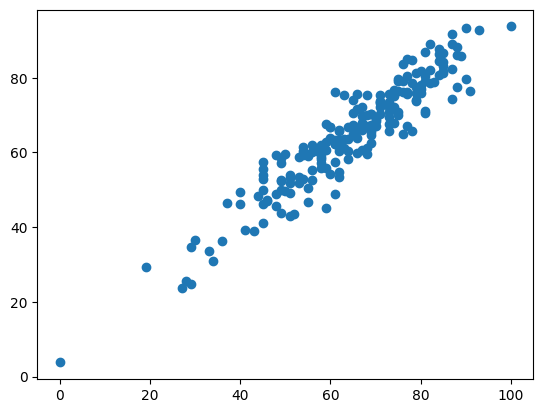

In [53]:
plt.scatter(y_test,y_pred)
plt.plt.xlabel("Actual")
plt.ylabel("Predicted")

<Axes: xlabel='math_score'>

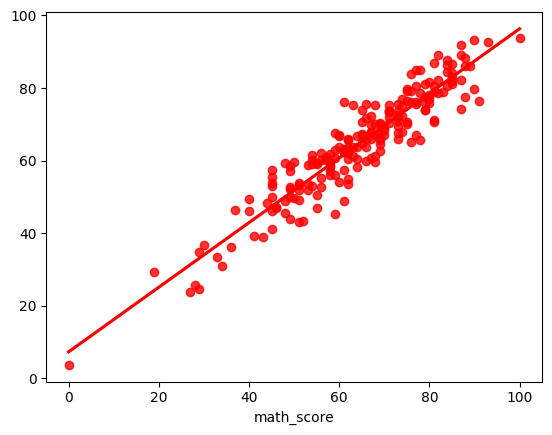

In [54]:
sns.regplot(x=y_test,y=y_pred,ci=None,color='red')

### Difference between actual and predicted

In [55]:
pred_df=pd.DataFrame({'Actual Value':y_test,'Predicted Value':y_pred,'Difference':y_test-y_pred})
pred_df

,Actual Value,Predicted Value,Difference
521,91,76.387970,14.612030
737,53,58.885970,-5.885970
740,80,76.990265,3.009735
660,74,76.851804,-2.851804
411,84,87.627378,-3.627378
...,...,...,...
408,52,43.409149,8.590851
332,62,62.152214,-0.152214
208,74,67.888395,6.111605
613,65,67.022287,-2.022287
